In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score

In [35]:
#Cargar data set
path = r'./../data/processed/online_news_popularity_clean.csv'
df_clean = pd.read_csv(path)

Splitting the data set

In [36]:
X = df_clean.drop('shares', axis=1)
y = df_clean['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

Se aplican transformaciones y escalamiento

In [28]:
# Transformaciones a columnas en X_train
X_train['n_tokens_content'] = np.log1p(X_train['n_tokens_content'])
X_train['num_hrefs'] = np.log1p(X_train['num_hrefs'])
X_train['kw_avg_max'] = np.sqrt(X_train['kw_avg_max'])
X_train['global_subjectivity'] = np.log1p(X_train['global_subjectivity'])
X_train['global_rate_positive_words'] = np.sqrt(X_train['global_rate_positive_words'])

# Columnas con Yeo-Johnson en X_train
pt = PowerTransformer(method='yeo-johnson')

X_train[['global_rate_negative_words', 'rate_positive_words', 'rate_negative_words']] = pt.fit_transform(
    X_train[['global_rate_negative_words', 'rate_positive_words', 'rate_negative_words']]
)
X_train['avg_positive_polarity'] = np.log1p(X_train['avg_positive_polarity'])

# Transformaciones en X_test
X_test['n_tokens_content'] = np.log1p(X_test['n_tokens_content'])
X_test['num_hrefs'] = np.log1p(X_test['num_hrefs'])
X_test['kw_avg_max'] = np.sqrt(X_test['kw_avg_max'])
X_test['global_subjectivity'] = np.log1p(X_test['global_subjectivity'])
X_test['global_rate_positive_words'] = np.sqrt(X_test['global_rate_positive_words'])

# Aplicar Yeo-Johnson en X_test
X_test[['global_rate_negative_words', 'rate_positive_words', 'rate_negative_words']] = pt.transform(
    X_test[['global_rate_negative_words', 'rate_positive_words', 'rate_negative_words']]
)
X_test['avg_positive_polarity'] = np.log1p(X_test['avg_positive_polarity'])


In [29]:
# Escalamiento de las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training de Model

In [30]:
# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo al conjunto de entrenamiento
model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

Evaluating the model

In [31]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")
print(f"R²: {r2}")

Error Cuadrático Medio: 1.696226597022639
R²: 0.0813629282151016


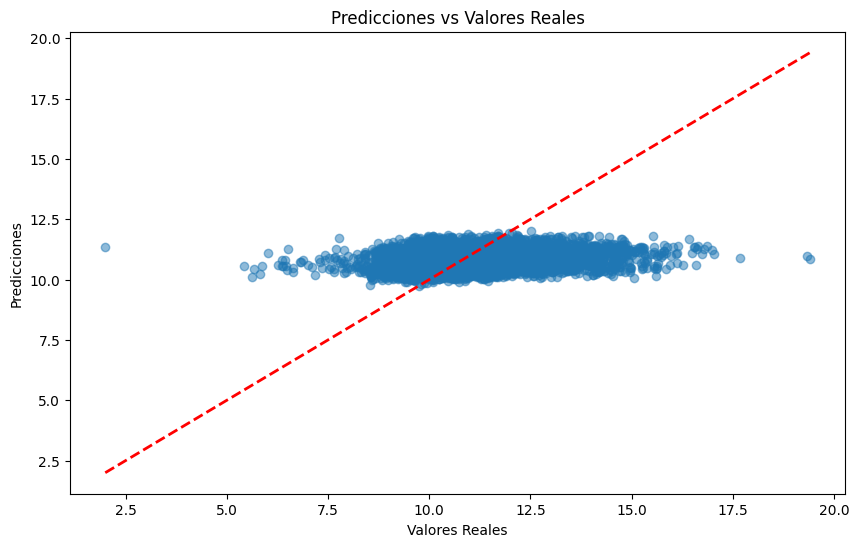

In [32]:
# Ver predicciones vs reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()